# 第9章 実際の課題への対応

## 新たな計算法

### Compact法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def init(xs, dx, jmax):
    x = np.linspace(xs, xs + dx * (jmax - 1), jmax) 
    q = np.sin(4 * np.pi * x)
    return (x, q)

In [3]:
def filter_LHS_4th():
    M = np.diag([1.0] * jmax)
    
    for j in range(-1, jmax - 1):
        M[j, j + 1] = M[j, j - 1] = alpha_f
        
    return M    

In [4]:
def filter_RHS_4th(rhs, f, alpha):        
    N = 2
    a = [5/8 + 3/4 * alpha, 1/2 + alpha, -1/8 + alpha/4]
    for j in range(-2, jmax - N):
        rhs[j] = 0.0
        for n in range(N + 1):
            rhs[j] += 0.5 * a[n] * (f[j + n] + f[j - n]) # 式(9.3)

In [5]:
def cmpt_LHS_4th():
    M = np.diag([1.0] * jmax)
    
    M[0, 1] = M[0, -1] = 1 / 4
    M[-1,0] = M[-1, -2] = 1 / 4 
    
    for j in range(1, jmax - 1):
        M[j, j + 1] = M[j, j - 1] = 1 / 4
        
    return M

In [6]:
def cmpt_RHS_4th(rhs, f):
    a = 3 / 2
    
    rhs[0] = a / (2 * dx) * (f[1] - f[-1])
    rhs[-1] = a / (2 * dx) * (f[0] - f[-2])
    
    for j in range(1, jmax - 1):
        rhs[j] = a / (2 * dx) * (f[j + 1] - f[j - 1])

In [7]:
def cmpt_4th(x, q, c, dt, dx, nmax, enable_filter = False, interval = 2):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ
    
    # 初期分布
    plt.plot(np.append(x, x[-1]+dx), np.append(q, q[0]), marker='o', lw=2, label='n=0') 
    
    L = cmpt_LHS_4th()
    Linv = np.linalg.inv(L)
    
    if enable_filter:
        FL = filter_LHS_4th()
        FLinv = np.linalg.inv(FL)
    
    R = np.zeros(jmax)
    for n in range(1, nmax + 1):
        
        qold = q.copy()

        coefs = [0.5, 1.0]
#        coefs = [1/4, 1/3, 1/2, 1]
        for coef in  coefs:
            f = c * qold
            cmpt_RHS_4th(R, f)
            dfdx = Linv @ R
            qold = q - coef * dt * dfdx

        if enable_filter:
            f = c * qold
            filter_RHS_4th(R, f, alpha_f)
            qold = FLinv @ R

        q = qold
            
        # 各ステップの可視化
        if n % interval == 0:
            plt.plot(np.append(x, x[-1]+dx), np.append(q, q[0]), marker='o', lw=2, label=f'n={n}')

    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlabel('x')
    plt.ylabel('q')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

In [8]:
xs, xe = -1, 1

jmax = 20 

c = 1
dx = 0.1
dt = 0.01
print(f'CFL={c * dt / dx : .3f}')

nmax = 100
x, q = init(xs, dx, jmax)

CFL= 0.100


In [9]:
L = cmpt_LHS_4th()
Linv = np.linalg.inv(L)

In [10]:
R = np.zeros(jmax)

In [11]:
qold = q.copy()

In [12]:
coefs = [0.5, 1.0]
#coefs = [1/4, 1/3, 1/2, 1]
for coef in  coefs:
    f = c * qold
    cmpt_RHS_4th(R, f)
    dfdx = Linv @ R
    qold = q - coef * dt * dfdx

## フィルタなし

CFL= 0.100


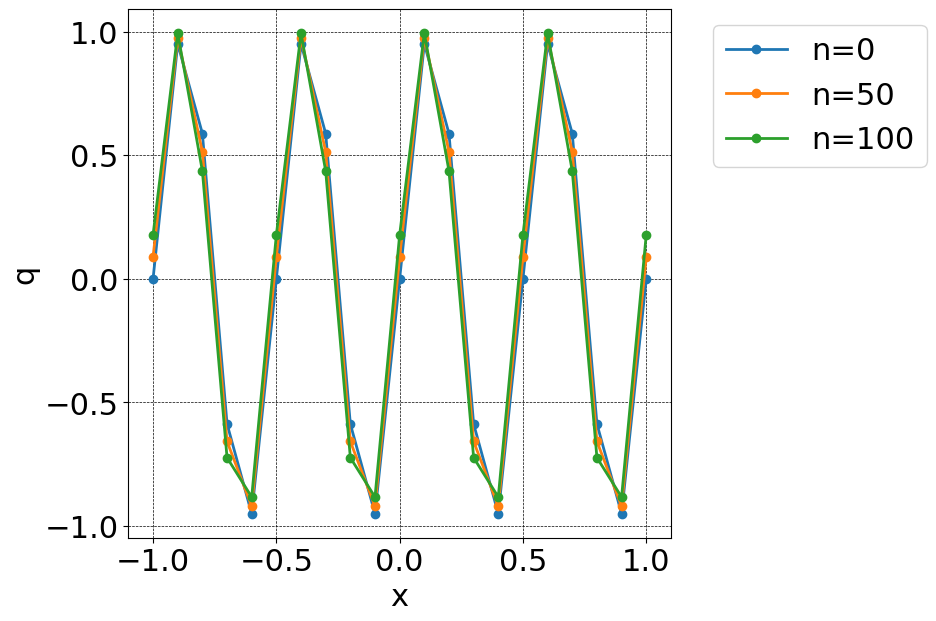

In [13]:
xs, xe = -1, 1

jmax = 20 

c = 1
dx = 0.1
dt = 0.01
print(f'CFL={c * dt / dx : .3f}')

nmax = 100
x, q = init(xs, dx, jmax)
cmpt_4th(x, q, c, dt, dx, nmax, enable_filter = False, interval = 50) # フィルタなし

## フィルタあり

CFL= 0.1000


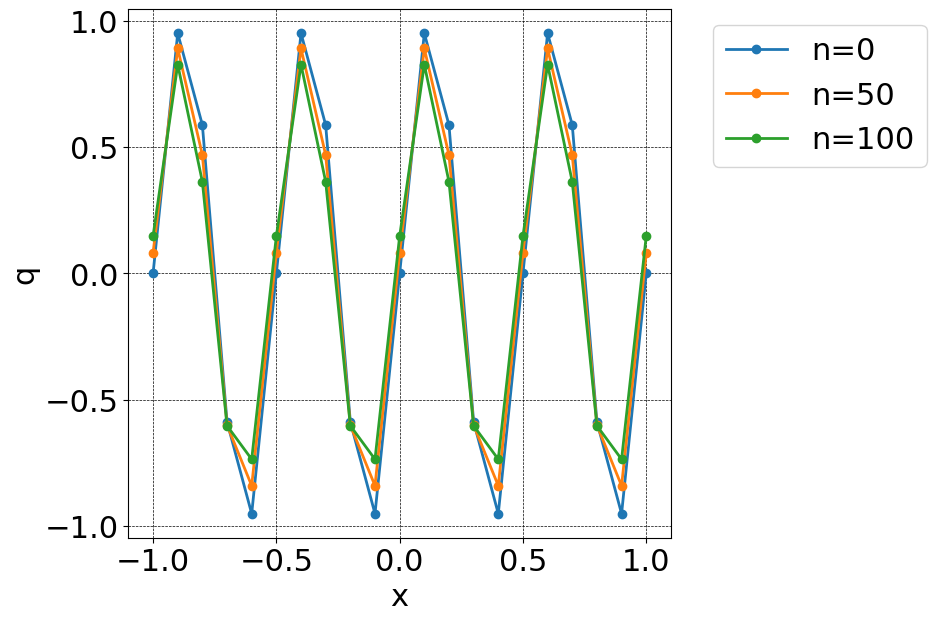

In [14]:
xs, xe = -1, 1

jmax = 20 

c = 1
dx = 0.1
dt = 0.01
print(f'CFL={c * dt / dx : .4f}')

alpha_f = 0.49

nmax = 100
x, q = init(xs, dx, jmax)
cmpt_4th(x, q, c, dt, dx, nmax, enable_filter = True, interval = 50) # フィルタあり